In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
%matplotlib inline

from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [4]:
labels_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'labels')
images_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'data')

with open(labels_path,'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
        
print(images_path)

with open(images_path,'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

print('images', images.shape)
print('labels', labels.shape)

/content/drive/MyDrive/Colab Notebooks/Fashion NN/data
images (60000, 784)
labels (60000,)


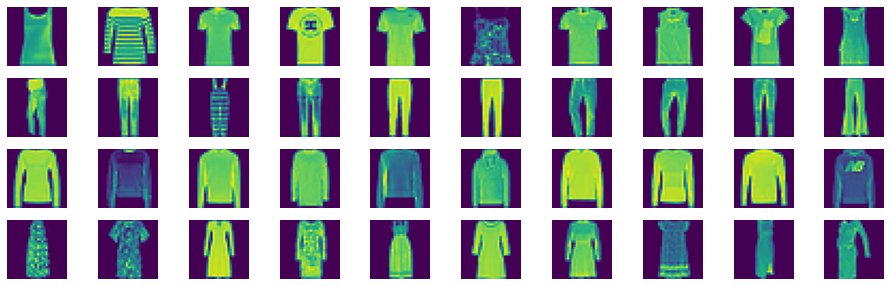

In [5]:
cols = 10
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(16, 5))
for i in range(rows):
    img = 0
    l = np.nonzero(labels == i)
    for j in np.random.choice(l[0], cols):
        axs[i, img].axis('off')
        hm = images[j, :].reshape(28, 28)
        axs[i, img].imshow(hm.astype(np.uint8))
        img += 1

In [6]:
print(labels)

[9 0 0 ... 3 0 5]


In [7]:
print(labels.shape)

(60000,)


In [8]:
encoder = LabelEncoder()
encoder.fit(labels)
Y = encoder.transform(labels)
Y = np_utils.to_categorical(labels)
print(Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print(Y.shape)

(60000, 10)


In [10]:
X = images / 255
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
print('Training dataset: ', X_train.shape, y_train.shape)
print('Testing dataset: ', X_test.shape, y_test.shape)

Training dataset:  (42000, 784) (42000, 10)
Testing dataset:  (18000, 784) (18000, 10)


In [46]:
r, c = np.shape(X_train)
input_dim = c

model = Sequential()
model.add(Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))  # Capa de salida con 10 unidades de activación que coinciden con las clases

In [47]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs = 250, batch_size = 1000, verbose = False)

In [49]:
model.evaluate(X_test, y_test)
# print(f'\n{model.metrics_names[1]}: {scores[1]*100:.2f}%')

563/563 [==============================] - 2s 3ms/step - loss: 0.4245 - accuracy: 0.8623


[0.424533873796463, 0.8622778058052063]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 6,480
Trainable params: 6,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Matriz de confusión para training
y_hat = model.predict(X_train)
print(y_hat.shape)

1313/1313 [==============================] - 3s 2ms/step
(42000, 10)


In [ ]:
y_hat_num = np.argmax(y_hat, axis = 1)
print(y_hat_num)

[7 3 9 ... 2 6 2]


In [ ]:
from sklearn.metrics import confusion_matrix
y_train_num = np.argmax(y_train, axis = 1)
cm = confusion_matrix(y_train_num, y_hat_num)
print(cm)

[[3577   14   46  226   17    3  263    1   67    3]
 [   6 4031    7  119   39    1    8    0   12    0]
 [  72    3 3026   58  658    2  315    0   44    0]
 [ 122   54   39 3751  123    5   83    1   12    0]
 [   4    5  285  170 3470    1  247    0   31    0]
 [   1    1    0    1    0 3890    1  157   18   76]
 [ 754   14  429  156  482    0 2273    0   89    0]
 [   0    0    0    0    0  119    0 3909    7  237]
 [  22    4   17   35   16   22   26   13 4023    6]
 [   0    0    0    0    1   54    0   96    5 4025]]


In [ ]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(8, 6))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

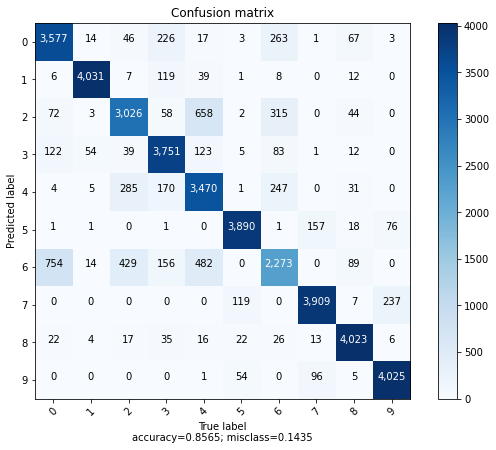

In [ ]:
plot_confusion_matrix(values = cm, classes = [str(i) for i in range(10)])

In [ ]:
y_test_num = np.argmax(y_test, axis = 1)
y_hat_test = model.predict(X_test)
y_hat_test_num = np.argmax(y_hat_test, axis = 1)

563/563 [==============================] - 2s 4ms/step


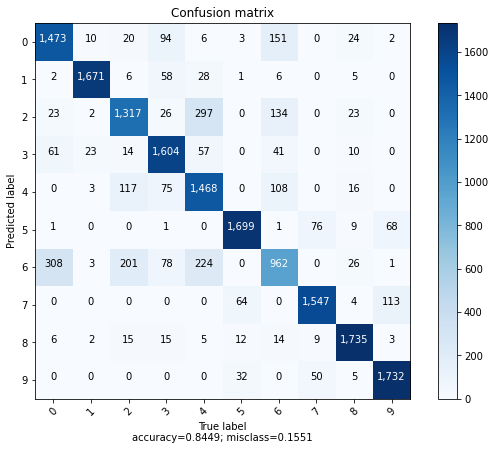

In [ ]:
cm_test = confusion_matrix(y_test_num, y_hat_test_num)
plot_confusion_matrix(values = cm_test, classes = [str(i) for i in range(10)])

## Conclusiones
Es importante corroborar los parámetros de cambio para obtener un mejor outcome y un modelo capaz de predecir en múltiples ambientes. Como se ha mencionado en el curso, es trabajo doctoral el determinar una combinación específica de parámetros de configuración, lo cual está muy muy lejos del objetivo de la clase.